In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_raw/df_final_demo.txt")

In [3]:
dc = pd.read_csv("https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_cleaned/df_final_clients.csv")

In [4]:
dc

,Unnamed: 0,client_id,Variation
0,0,9988021,Test
1,1,8320017,Test
2,2,4033851,Control
3,3,1982004,Test
4,4,9294070,Control
...,...,...,...
50495,50495,393005,Control
50496,50496,2908510,Control
50497,50497,7230446,Test
50498,50498,5230357,Test


In [5]:
dc.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
dc

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [7]:
df #df initial: 70609 rows × 9 columns

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [8]:
df_merged = pd.merge(df , dc , on = "client_id", how = "left")

In [9]:
df_merged 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [10]:
df_AB_demo = df_merged.dropna(subset=['Variation'])

In [11]:
df_AB_demo #50,500

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [12]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [13]:
df.shape 

(70609, 9)

In [14]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [15]:
df.client_id.dtype

dtype('int64')

In [16]:
df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [17]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [18]:
df["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [19]:
mapping = {
    'U': 'Unknown',
    'M': 'Male',
    'F': 'Female',
    'X': 'Other'
}

# Replace the categories
df['gendr'] = df['gendr'].replace(mapping)

# Handle NaN values if needed
df['gendr'] = df['gendr'].fillna('Not Specified')

print (df['gendr'])

0        Unknown
1        Unknown
2        Unknown
3           Male
4         Female
          ...   
70604    Unknown
70605       Male
70606     Female
70607       Male
70608     Female
Name: gendr, Length: 70609, dtype: object


In [20]:
df = df[~df['gendr'].isin(['Not Specified', 'Other'])]

In [21]:
print (df['gendr'])

0        Unknown
1        Unknown
2        Unknown
3           Male
4         Female
          ...   
70604    Unknown
70605       Male
70606     Female
70607       Male
70608     Female
Name: gendr, Length: 70592, dtype: object


In [22]:
df.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [23]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70592
bal                 70325
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [24]:
# moving on to data cleaning 

# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

clnt_age            1
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [25]:
## EDA day two for who are the key clients who particpated in the experiment 

In [26]:
#removing duplicates
df.drop_duplicates(inplace=True)

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/3434901942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


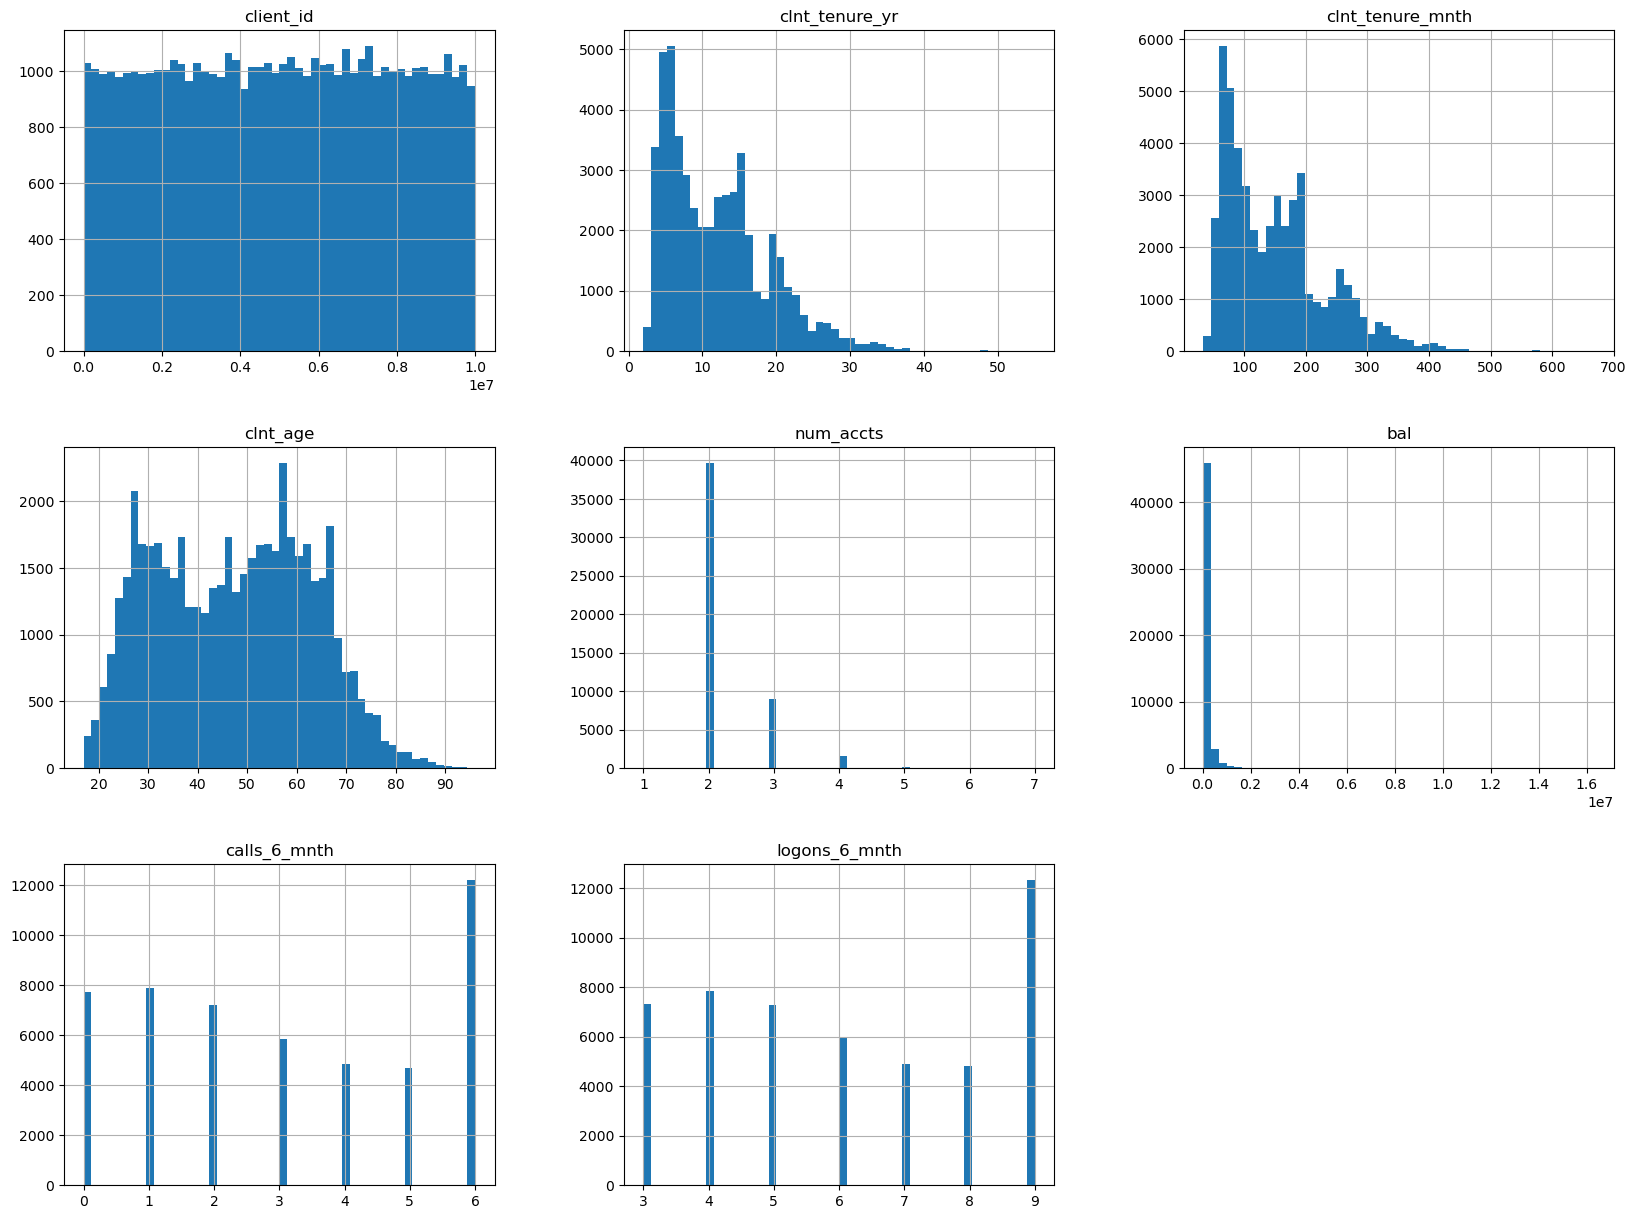

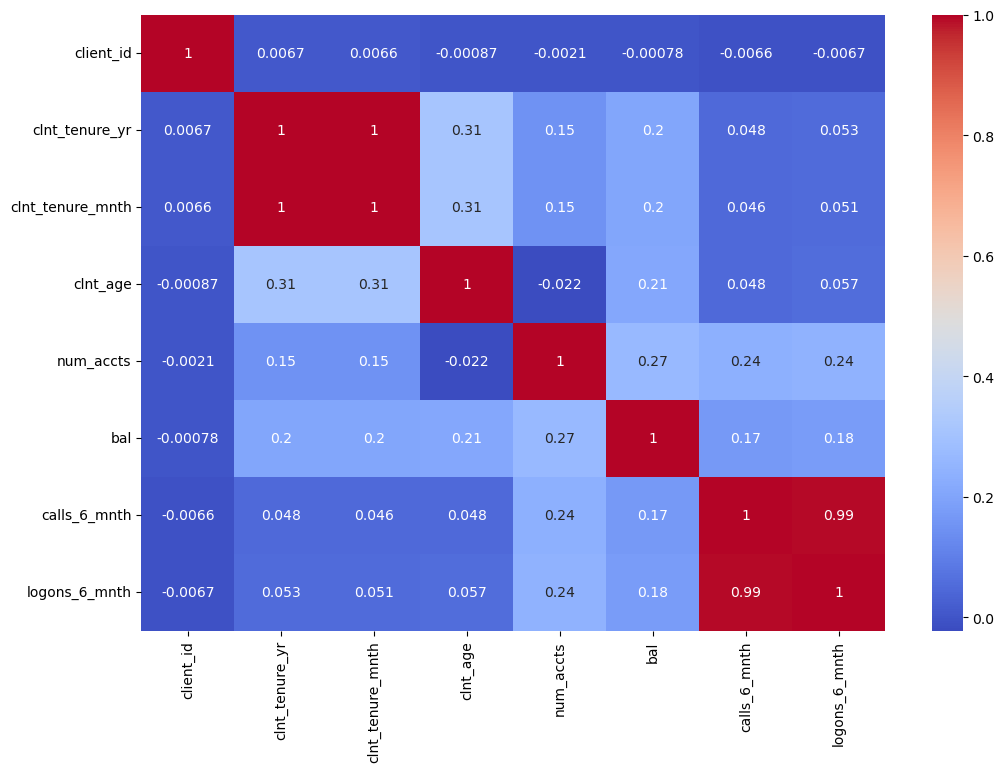

In [27]:
#Removing non-numeric columns for correlation matrix
numeric_df = df_AB_demo.select_dtypes(include=[np.number])

# Basic Data Visualization

# Plotting distributions of numerical features
numeric_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Plotting correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:

# Calculate the mean of the age distribution
mean_age = df_AB_demo['clnt_age'].mean()

# Calculate the mode of the age distribution
mode_age = df_AB_demo['clnt_age'].mode()[0]

# Print the mean and mode
print(f'The mean age of clients is: {mean_age:.2f} years')
print(f'The mode age of clients is: {mode_age:.2f} years')

The mean age of clients is: 47.32 years
The mode age of clients is: 58.50 years


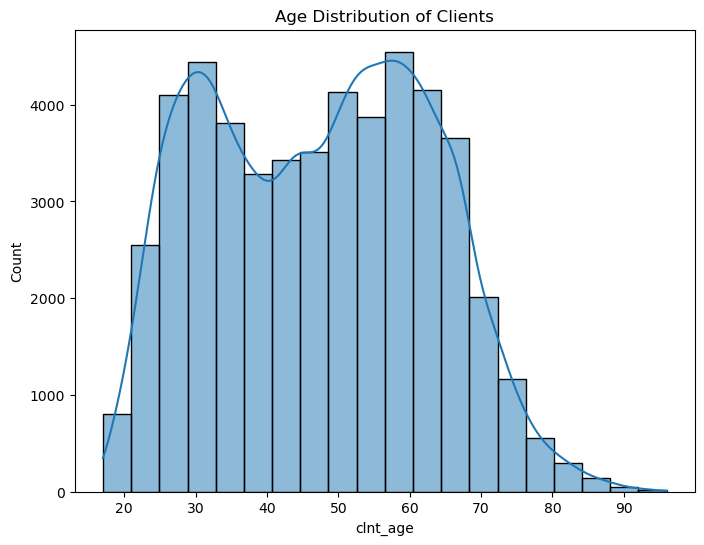

In [29]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_AB_demo, x='clnt_age', bins=20, kde=True)
plt.title('Age Distribution of Clients')
plt.show()

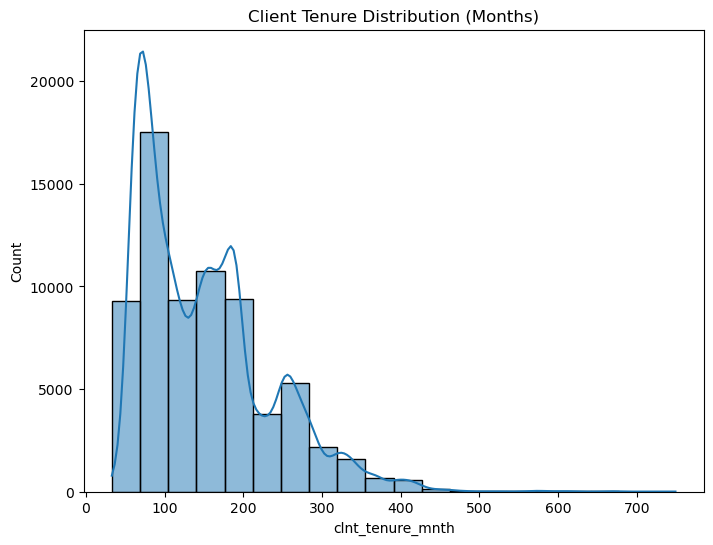

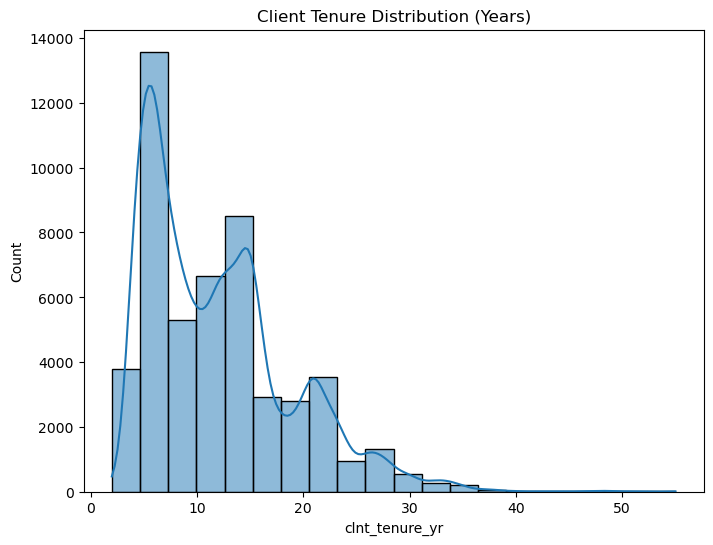

In [30]:
# Tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='clnt_tenure_mnth', bins=20, kde=True)
plt.title('Client Tenure Distribution (Months)')
plt.show()

# Tenure distribution in years
plt.figure(figsize=(8, 6))
sns.histplot(data=df_AB_demo, x='clnt_tenure_yr', bins=20, kde=True)
plt.title('Client Tenure Distribution (Years)')
plt.show()


The mean tenure of clients is: 150.42 months


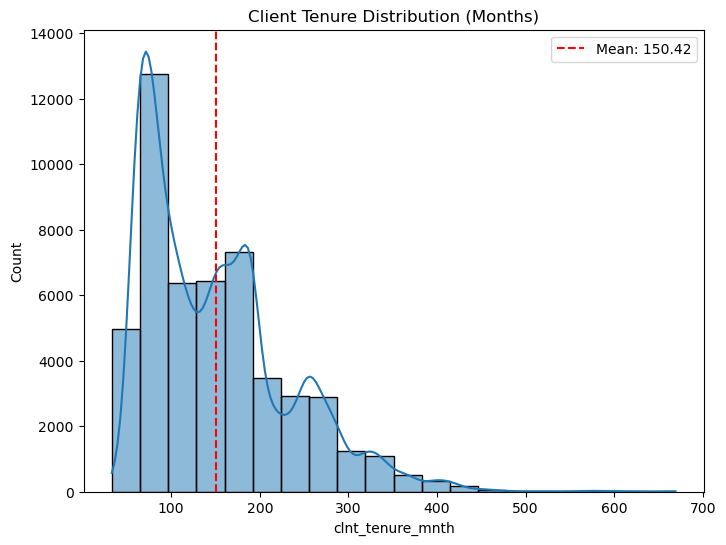

In [31]:
# Calculate the mean of the tenure distribution in months
mean_tenure_mnth = df_AB_demo['clnt_tenure_mnth'].mean()

# Print the mean tenure in months
print(f'The mean tenure of clients is: {mean_tenure_mnth:.2f} months')

# Plot the tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df_AB_demo, x='clnt_tenure_mnth', bins=20, kde=True)
plt.axvline(mean_tenure_mnth, color='r', linestyle='--', label=f'Mean: {mean_tenure_mnth:.2f}')
plt.title('Client Tenure Distribution (Months)')
plt.legend()
plt.show()

In [32]:
# Calculate average age of clients
average_age = df['clnt_age'].mean()
print(f'The average age of clients is: {average_age:.2f} years')


The average age of clients is: 46.44 years


The mean tenure of clients is: 12.03 years


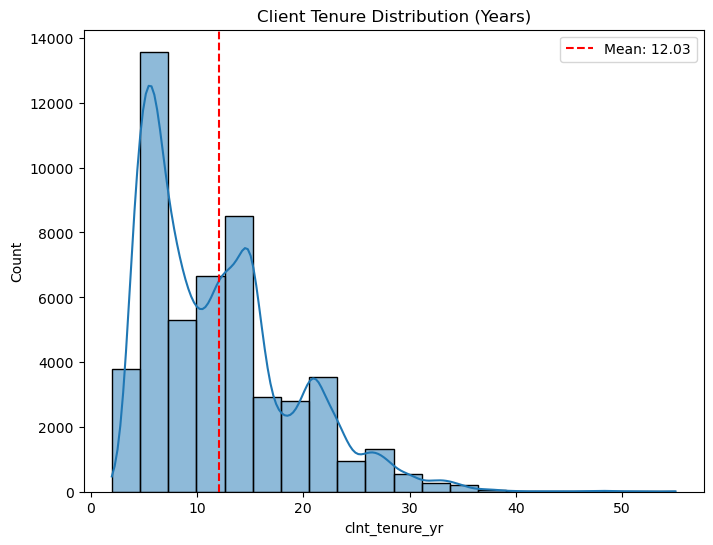

In [33]:
# Calculate the mean of the tenure distribution in months
mean_tenure_yr = df_AB_demo['clnt_tenure_yr'].mean()

# Print the mean tenure in months
print(f'The mean tenure of clients is: {mean_tenure_yr:.2f} years')

# Plot the tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df_AB_demo, x='clnt_tenure_yr', bins=20, kde=True)
plt.axvline(mean_tenure_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_yr:.2f}')
plt.title('Client Tenure Distribution (Years)')
plt.legend()
plt.show()

The mean tenure of clients is: 11.98 years


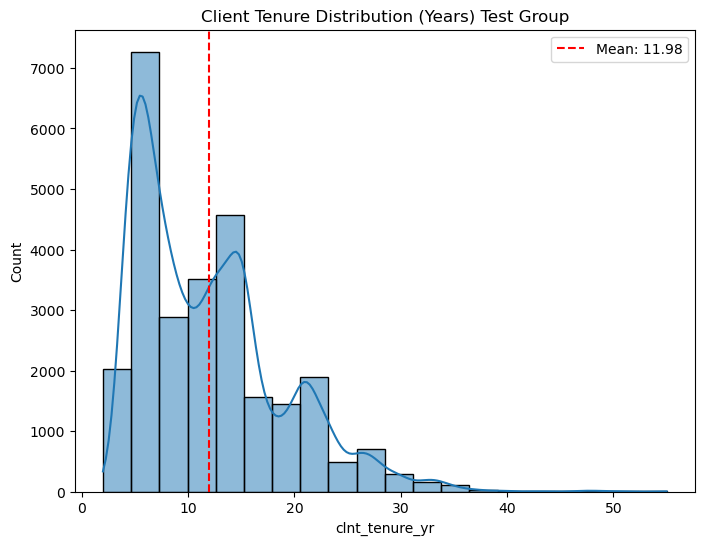

In [34]:
# Calculate the mean of the tenure distribution in months
df_test = df_AB_demo[df_AB_demo["Variation"]== "Test"]

mean_tenure_yr = df_test['clnt_tenure_yr'].mean()

# Print the mean tenure in months
print(f'The mean tenure of clients is: {mean_tenure_yr:.2f} years')

# Plot the tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df_test, x='clnt_tenure_yr', bins=20, kde=True)
plt.axvline(mean_tenure_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_yr:.2f}')
plt.title('Client Tenure Distribution (Years) Test Group')
plt.legend()
plt.show()

The mean tenure of clients is: 12.09 years


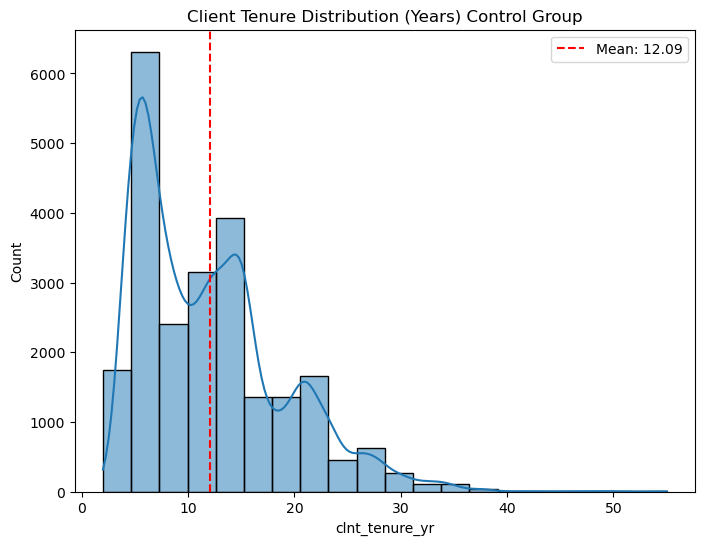

In [35]:
# Calculate the mean of the tenure distribution in months
df_control = df_AB_demo[df_AB_demo["Variation"]== "Control"]

mean_tenure_yr = df_control['clnt_tenure_yr'].mean()

# Print the mean tenure in months
print(f'The mean tenure of clients is: {mean_tenure_yr:.2f} years')

# Plot the tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df_control, x='clnt_tenure_yr', bins=20, kde=True)
plt.axvline(mean_tenure_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_yr:.2f}')
plt.title('Client Tenure Distribution (Years) Control Group')
plt.legend()
plt.show()

In [36]:
# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)



/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/1374796756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/1523005529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/1523005529.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)


The mean tenure of clients is: 12.59 years


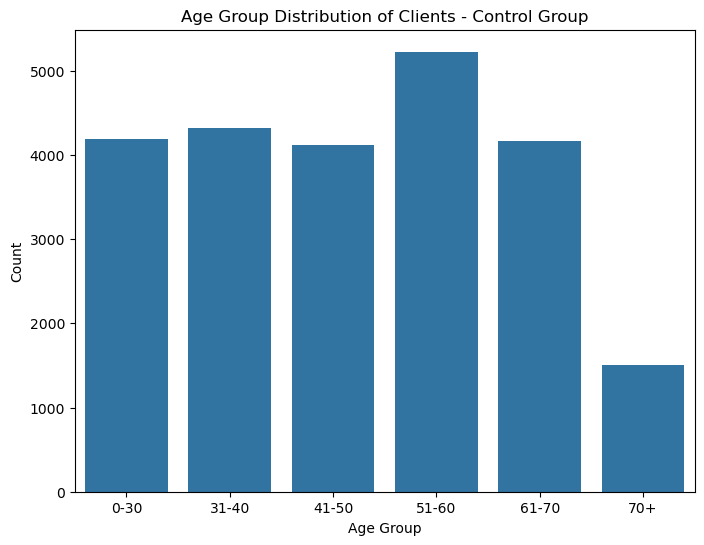

In [37]:
# Calculate the mean of the tenure distribution in months for the control group
df_control = df_AB_demo[df_AB_demo["Variation"] == "Control"]

# Convert tenure from months to years and add a new column
df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12

# Calculate the mean tenure in years
mean_tenure_yr = df_control['clnt_tenure_yr'].mean()

# Print the mean tenure in years
print(f'The mean tenure of clients is: {mean_tenure_yr:.2f} years')


# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)

# Plot the age group distribution for the control group
plt.figure(figsize=(8, 6))
sns.countplot(data=df_control, x='age_group')
plt.title('Age Group Distribution of Clients - Control Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


The mean tenure of clients is: 12.49 years


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/120953584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['clnt_tenure_yr'] = df_test['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/120953584.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)


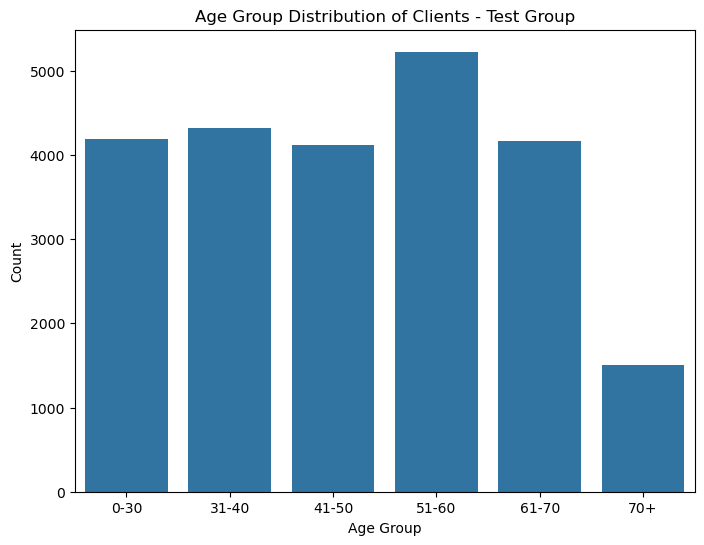

In [38]:
# Calculate the mean of the tenure distribution in months for the control group
df_test = df_AB_demo[df_AB_demo["Variation"] == "Test"]

# Convert tenure from months to years and add a new column
df_test['clnt_tenure_yr'] = df_test['clnt_tenure_mnth'] / 12

# Calculate the mean tenure in years
mean_tenure_yr = df_test['clnt_tenure_yr'].mean()

# Print the mean tenure in years
print(f'The mean tenure of clients is: {mean_tenure_yr:.2f} years')


# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)

# Plot the age group distribution for the control group
plt.figure(figsize=(8, 6))
sns.countplot(data=df_control, x='age_group')
plt.title('Age Group Distribution of Clients - Test Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/2671891250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/2671891250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/2671891250.py:9: SettingWithCopyW

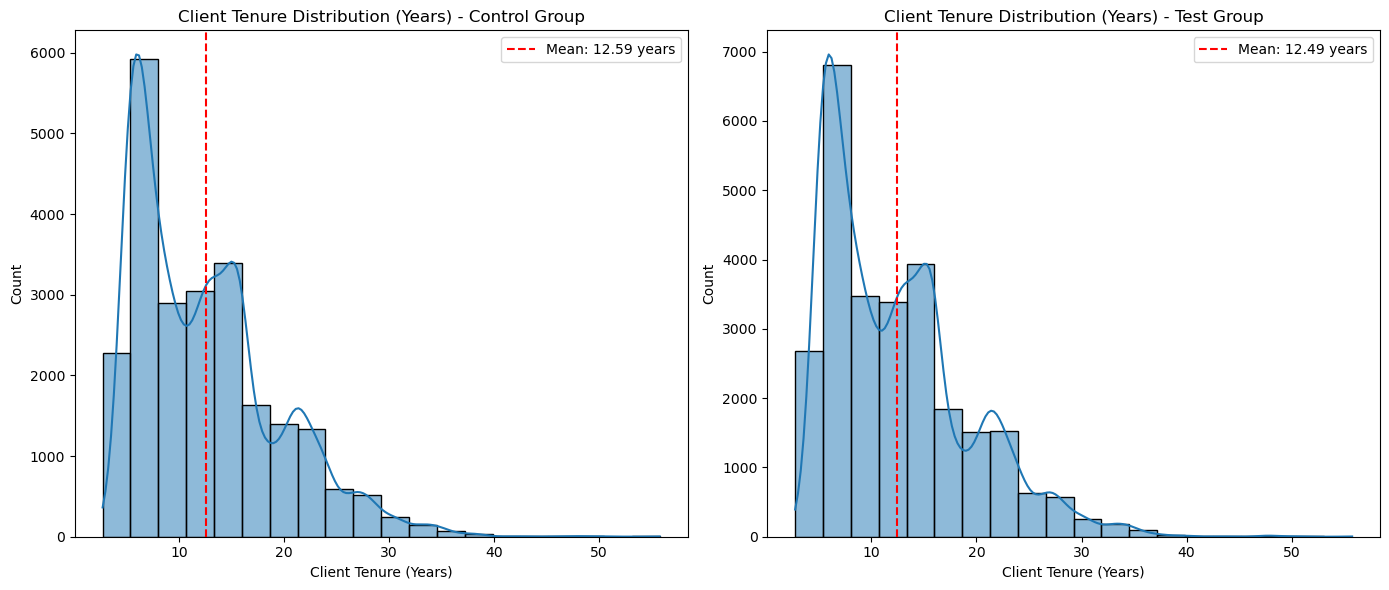

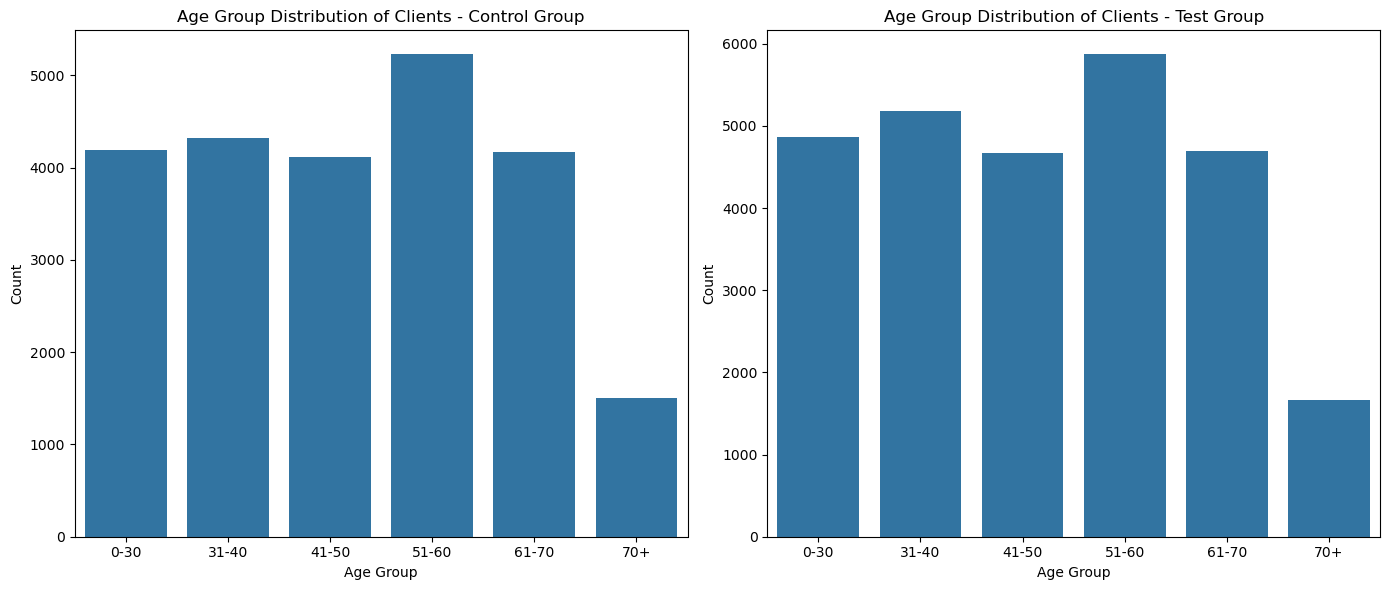

In [39]:
# Data preparation for the control group
df_control = df_AB_demo[df_AB_demo["Variation"] == "Control"]
df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12
mean_tenure_control_yr = df_control['clnt_tenure_yr'].mean()
df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)

# Data preparation for the test group
df_test = df_AB_demo[df_AB_demo["Variation"] == "Test"]
df_test['clnt_tenure_yr'] = df_test['clnt_tenure_mnth'] / 12
mean_tenure_test_yr = df_test['clnt_tenure_yr'].mean()
df_test['age_group'] = pd.cut(df_test['clnt_age'], bins=age_bins, labels=age_labels)

# Plotting tenure distribution comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_control, x='clnt_tenure_yr', bins=20, kde=True)
plt.axvline(mean_tenure_control_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_control_yr:.2f} years')
plt.title('Client Tenure Distribution (Years) - Control Group')
plt.xlabel('Client Tenure (Years)')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data=df_test, x='clnt_tenure_yr', bins=20, kde=True)
plt.axvline(mean_tenure_test_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_test_yr:.2f} years')
plt.title('Client Tenure Distribution (Years) - Test Group')
plt.xlabel('Client Tenure (Years)')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting age group distribution comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_control, x='age_group')
plt.title('Age Group Distribution of Clients - Control Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_test, x='age_group')
plt.title('Age Group Distribution of Clients - Test Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/3416623739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/3416623739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['clnt_tenure_yr'] = df_test['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/3416623739.py:14: SettingWithCopyWarning: 
A value is trying to

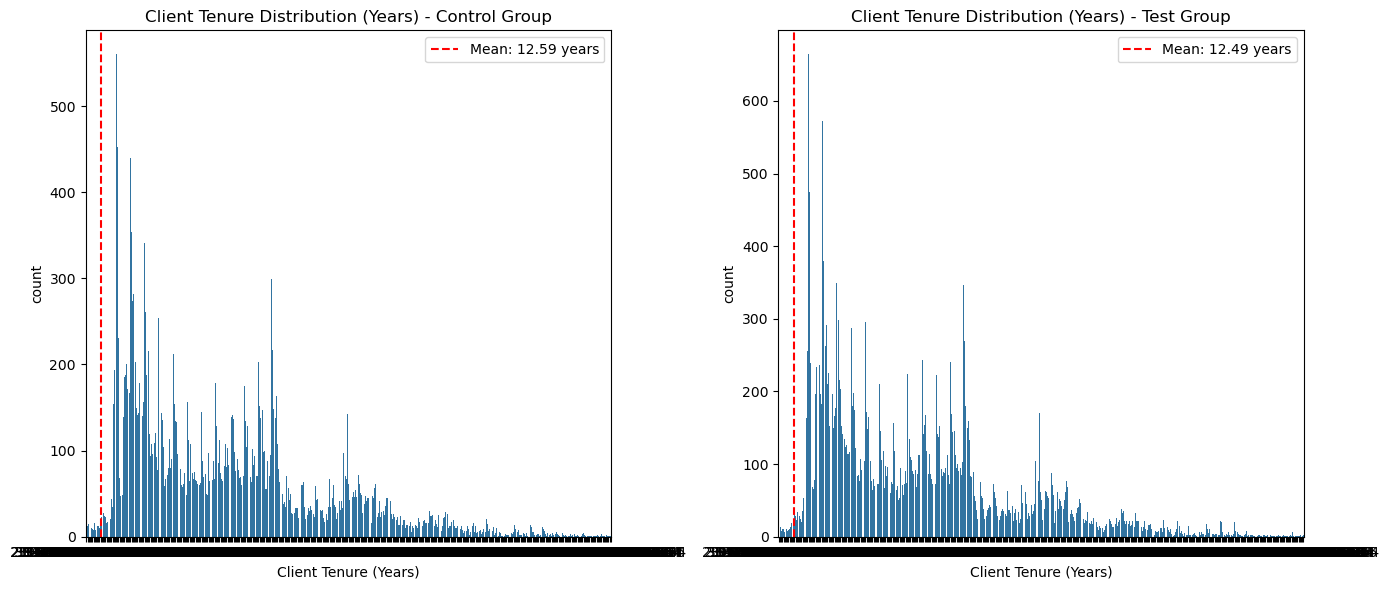

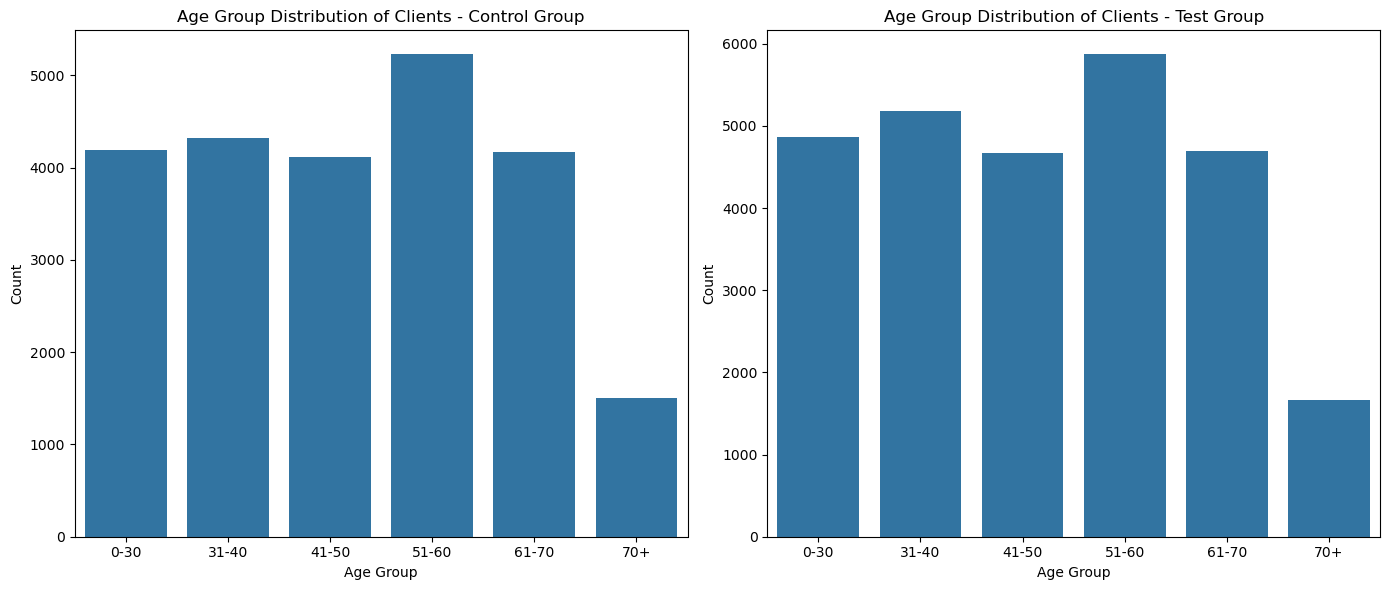

In [40]:

# Data preparation for the control group
df_control = df_AB_demo[df_AB_demo["Variation"] == "Control"]
df_control['clnt_tenure_yr'] = df_control['clnt_tenure_mnth'] / 12
mean_tenure_control_yr = df_control['clnt_tenure_yr'].mean()

# Data preparation for the test group
df_test = df_AB_demo[df_AB_demo["Variation"] == "Test"]
df_test['clnt_tenure_yr'] = df_test['clnt_tenure_mnth'] / 12
mean_tenure_test_yr = df_test['clnt_tenure_yr'].mean()

# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_control['age_group'] = pd.cut(df_control['clnt_age'], bins=age_bins, labels=age_labels)
df_test['age_group'] = pd.cut(df_test['clnt_age'], bins=age_bins, labels=age_labels)

# Plotting tenure distribution comparison using count plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_control, x='clnt_tenure_yr')
plt.axvline(mean_tenure_control_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_control_yr:.2f} years')
plt.title('Client Tenure Distribution (Years) - Control Group')
plt.xlabel('Client Tenure (Years)')
plt.legend()

plt.subplot(1, 2, 2)
sns.countplot(data=df_test, x='clnt_tenure_yr')
plt.axvline(mean_tenure_test_yr, color='r', linestyle='--', label=f'Mean: {mean_tenure_test_yr:.2f} years')
plt.title('Client Tenure Distribution (Years) - Test Group')
plt.xlabel('Client Tenure (Years)')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting age group distribution comparison using count plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_control, x='age_group')
plt.title('Age Group Distribution of Clients - Control Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_test, x='age_group')
plt.title('Age Group Distribution of Clients - Test Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/866374343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB_demo['clnt_tenure_yr'] = df_AB_demo['clnt_tenure_mnth'] / 12
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/866374343.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB_demo['age_group'] = pd.cut(df_AB_demo['clnt_age'], bins=age_bins, labels=age_labels)
/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/866374343.py:21: FutureWarning: 



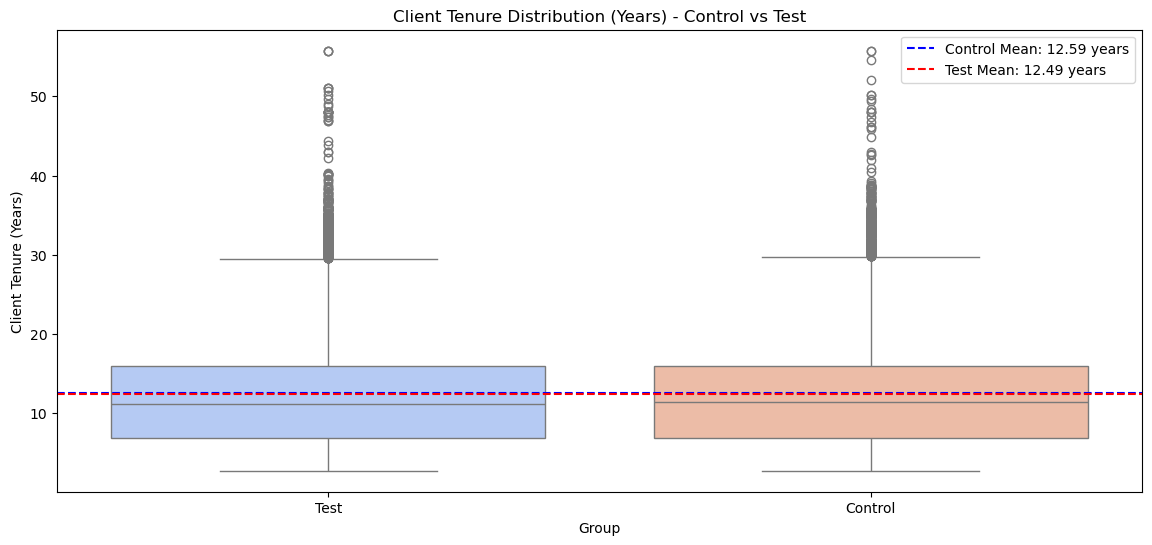

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/866374343.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_AB_demo.groupby(['age_group', 'Variation']).size().reset_index(name='count')


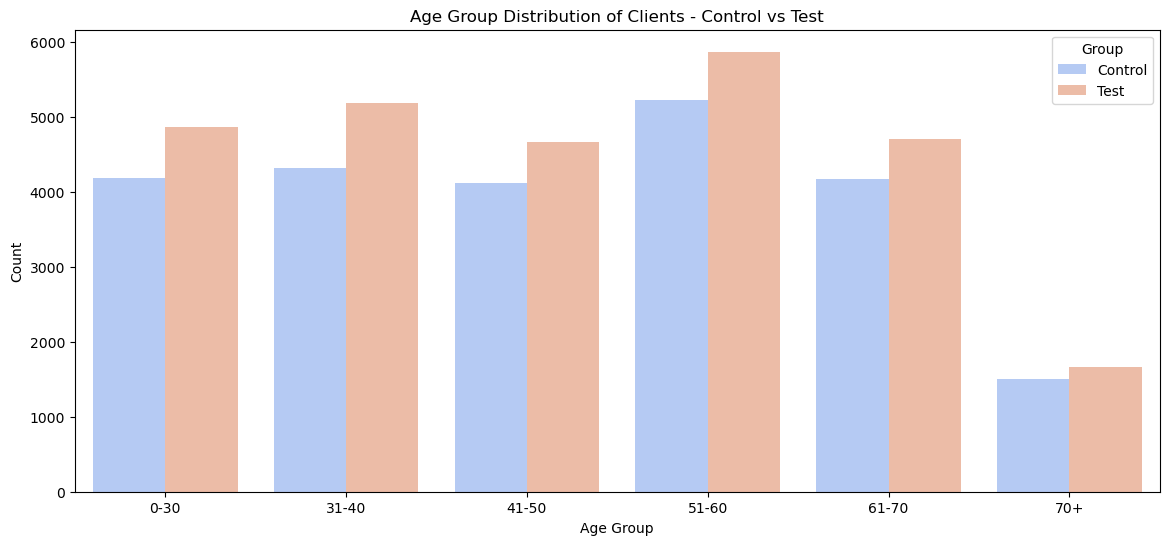

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_AB_demo is your DataFrame and it contains the columns 'Variation', 'clnt_tenure_mnth', and 'clnt_age'

# Convert tenure from months to years for the entire DataFrame
df_AB_demo['clnt_tenure_yr'] = df_AB_demo['clnt_tenure_mnth'] / 12

# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_AB_demo['age_group'] = pd.cut(df_AB_demo['clnt_age'], bins=age_bins, labels=age_labels)

# Calculate mean tenure for control and test groups
mean_tenure_control_yr = df_AB_demo[df_AB_demo["Variation"] == "Control"]['clnt_tenure_yr'].mean()
mean_tenure_test_yr = df_AB_demo[df_AB_demo["Variation"] == "Test"]['clnt_tenure_yr'].mean()

# Plotting tenure distribution comparison using box plots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_AB_demo, x='Variation', y='clnt_tenure_yr', palette="coolwarm")
plt.axhline(mean_tenure_control_yr, color='blue', linestyle='--', label=f'Control Mean: {mean_tenure_control_yr:.2f} years')
plt.axhline(mean_tenure_test_yr, color='red', linestyle='--', label=f'Test Mean: {mean_tenure_test_yr:.2f} years')
plt.title('Client Tenure Distribution (Years) - Control vs Test')
plt.xlabel('Group')
plt.ylabel('Client Tenure (Years)')
plt.legend()
plt.show()

# Plotting age group distribution comparison using grouped bar plots
age_group_counts = df_AB_demo.groupby(['age_group', 'Variation']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.barplot(data=age_group_counts, x='age_group', y='count', hue='Variation', palette="coolwarm")
plt.title('Age Group Distribution of Clients - Control vs Test')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

In [42]:
# Insights:
#Age: The primary clients tend to be older, with the mean age of clients is: 46.44 years
#Tenure: The primary clients are generally long-standing, with an The mean tenure of clients is: 150.42 months as indicated by the tenure distribution.



In [43]:
df_AB_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_group
0,836976,6.083333,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,61-70
1,2304905,7.833333,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,51-60
2,1439522,5.333333,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,31-40
3,1562045,16.500000,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,41-50
4,5126305,12.083333,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,31-40


In [44]:
# Check the column names to identify the correct column for the group
print(df_AB_demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'age_group'],
      dtype='object')


In [45]:
#age, 

df_AB_demo.describe().round(2)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,50500.00,50488.00,50488.00,50487.00,50488.00,50488.00,50488.00,50488.00
mean,5006179.06,12.53,150.42,47.32,2.25,149514.68,3.09,6.13
std,2877442.53,6.83,81.94,15.52,0.53,302036.42,2.19,2.18
min,555.00,2.75,33.00,17.00,1.00,23789.44,0.00,3.00
25%,2515645.75,6.83,82.00,33.50,2.00,39878.41,1.00,4.00
50%,5025103.50,11.33,136.00,48.00,2.00,65733.60,3.00,6.00
75%,7477933.25,16.00,192.00,59.50,2.00,139956.54,5.00,8.00
max,9999832.00,55.75,669.00,96.00,7.00,16320040.15,6.00,9.00


In [46]:
df_AB_demo.clnt_age.unique() 

array([60.5, 58. , 32. , 49. , 33. , 30.5, 58.5, 57.5, 67.5, 54.5, 34.5,
       51.5, 62.5, 36. , 74. , 32.5, 31. , 25.5, 42.5, 42. , 30. , 55. ,
       38. , 68.5, 52.5, 54. , 63. , 48. , 66.5, 68. , 65. , 51. , 46. ,
       63.5, 23. , 26.5, 56.5, 76.5, 27.5, 39.5, 25. , 27. , 60. , 66. ,
       39. , 56. , 40. , 52. , 31.5, 43.5, 35. , 19. , 64.5, 64. , 22.5,
       33.5, 36.5, 61. , 40.5, 72. , 44.5, 28.5, 59.5, 45. , 18. , 78. ,
       50.5, 29. , 37.5, 57. , 70. , 74.5, 22. , 50. , 53. , 62. , 65.5,
       29.5, 28. , 69.5, 35.5, 71.5, 34. , 38.5, 69. , 43. , 83.5, 21.5,
       47. , 61.5, 73.5, 71. , 59. , 21. , 44. , 83. , 47.5, 72.5, 76. ,
       78.5, 55.5, 67. , 41.5, 20.5, 75. , 24. , 79. , 26. , 41. , 23.5,
       49.5, 46.5, 45.5, 48.5, 24.5, 75.5, 80. , 73. , 87. , 19.5, 53.5,
       18.5, 70.5, 80.5, 86. , 37. , 85. , 17.5, 82. , 20. , 77.5, 77. ,
       79.5, 88.5, 96. , 81. , 81.5, 88. , 84. ,  nan, 94.5, 89. , 92. ,
       82.5, 91.5, 85.5, 95.5, 84.5, 90. , 89.5, 93

In [47]:
df_AB_demo.clnt_age.isnull().sum()

13

In [48]:
df_AB_demo.clnt_age.unique() 

array([60.5, 58. , 32. , 49. , 33. , 30.5, 58.5, 57.5, 67.5, 54.5, 34.5,
       51.5, 62.5, 36. , 74. , 32.5, 31. , 25.5, 42.5, 42. , 30. , 55. ,
       38. , 68.5, 52.5, 54. , 63. , 48. , 66.5, 68. , 65. , 51. , 46. ,
       63.5, 23. , 26.5, 56.5, 76.5, 27.5, 39.5, 25. , 27. , 60. , 66. ,
       39. , 56. , 40. , 52. , 31.5, 43.5, 35. , 19. , 64.5, 64. , 22.5,
       33.5, 36.5, 61. , 40.5, 72. , 44.5, 28.5, 59.5, 45. , 18. , 78. ,
       50.5, 29. , 37.5, 57. , 70. , 74.5, 22. , 50. , 53. , 62. , 65.5,
       29.5, 28. , 69.5, 35.5, 71.5, 34. , 38.5, 69. , 43. , 83.5, 21.5,
       47. , 61.5, 73.5, 71. , 59. , 21. , 44. , 83. , 47.5, 72.5, 76. ,
       78.5, 55.5, 67. , 41.5, 20.5, 75. , 24. , 79. , 26. , 41. , 23.5,
       49.5, 46.5, 45.5, 48.5, 24.5, 75.5, 80. , 73. , 87. , 19.5, 53.5,
       18.5, 70.5, 80.5, 86. , 37. , 85. , 17.5, 82. , 20. , 77.5, 77. ,
       79.5, 88.5, 96. , 81. , 81.5, 88. , 84. ,  nan, 94.5, 89. , 92. ,
       82.5, 91.5, 85.5, 95.5, 84.5, 90. , 89.5, 93

In [49]:
df_AB_demo.isnull().sum()

client_id            0
clnt_tenure_yr      12
clnt_tenure_mnth    12
clnt_age            13
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
Variation            0
age_group           13
dtype: int64

In [50]:
df_AB=df_AB_demo.dropna(subset=["clnt_age"])

In [51]:
df_AB.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
age_group           0
dtype: int64

In [52]:

# Calculate the mean of the age distribution
mean_age = df_AB['clnt_age'].mean()

# Calculate the mode of the age distribution
mode_age = df_AB['clnt_age'].mode()[0]

# Print the mean and mode
print(f'The mean age of clients is: {mean_age:.2f} years')
print(f'The mode age of clients is: {mode_age:.2f} years')

The mean age of clients is: 47.32 years
The mode age of clients is: 58.50 years


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/2364724646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_AB,x="Variation", y="clnt_age", palette="coolwarm")


<Axes: xlabel='Variation', ylabel='clnt_age'>

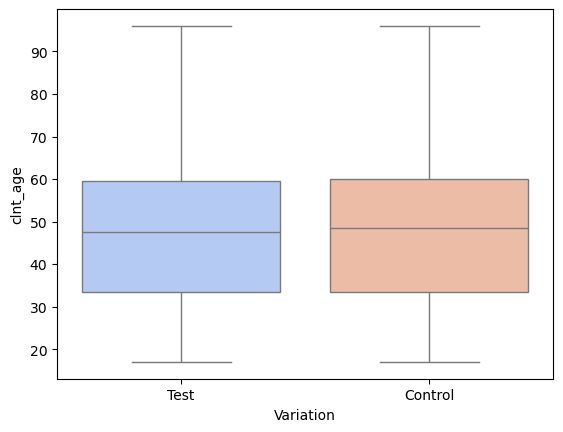

In [53]:
sns.boxplot(data=df_AB,x="Variation", y="clnt_age", palette="coolwarm")

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/2613071951.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_AB,x="Variation", y="clnt_tenure_yr", palette="coolwarm")


<Axes: xlabel='Variation', ylabel='clnt_tenure_yr'>

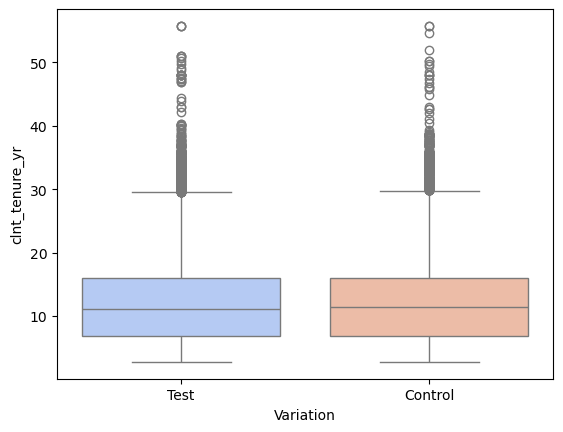

In [54]:
sns.boxplot(data=df_AB,x="Variation", y="clnt_tenure_yr", palette="coolwarm")

/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_19500/4047016023.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_AB,x="Variation", y="bal", palette="coolwarm")


<Axes: xlabel='Variation', ylabel='bal'>

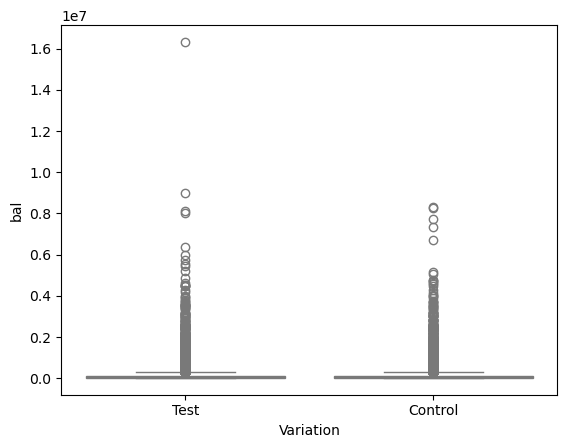

In [55]:
sns.boxplot(data=df_AB,x="Variation", y="bal", palette="coolwarm")


In [56]:
df_AB.shape

#(50487, 10) 

(50487, 11)

In [57]:
df_AB.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'age_group'],
      dtype='object')

In [58]:
df_AB.client_id.value_counts().sum()

50487

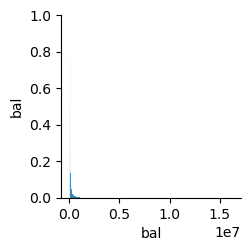

In [59]:
sns.pairplot(df_AB[["Variation", "bal"]])

In [61]:
df_AB.to_csv("/Users/karollvivianalopezvillegas/GitHub/vanguard-ab-test/Datasets_cleaned/df_demo_AB.csv")

In [ ]:
#hello